# Visualize data

In order to start making interpretations we will generate two visualizations of our data

First, we will verify that the simulated dataset is a good representation of our original input dataset by visually comparing the structures in the two datasets projected onto UMAP space.

Second, we will plot the PCA project data after adding batch effects to examine how the batch effects shift the data

In [1]:
%load_ext autoreload
%autoreload 2

import os
import ast
import pandas as pd
import numpy as np
import random
import glob
from plotnine import ggplot, ggtitle, xlab, ylab, geom_point, aes, facet_wrap
from sklearn.decomposition import PCA
from keras.models import load_model
import umap

import warnings
warnings.filterwarnings(action='ignore')

from numpy.random import seed
randomState = 123
seed(randomState)

/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# User parameters
NN_architecture = 'NN_2500_30'
analysis_name = 'analysis_0'
num_dims=5000
num_simulated_samples = 6000
lst_num_experiments = [1,2,5,10,20,50,100,500,1000,2000,3000,6000]

In [3]:
# Load data
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../.."))

normalized_data_file = os.path.join(
    base_dir,
    "data",
    "input",
    "train_set_normalized.pcl")

model_encoder_file = glob.glob(os.path.join(
    base_dir,
    "models",
    NN_architecture,
    "*_encoder_model.h5"))[0]

weights_encoder_file = glob.glob(os.path.join(
    base_dir,
    "models",
    NN_architecture,
    "*_encoder_weights.h5"))[0]

model_decoder_file = glob.glob(os.path.join(
    base_dir,
    "models", 
    NN_architecture,
    "*_decoder_model.h5"))[0]


weights_decoder_file = glob.glob(os.path.join(
    base_dir,
    "models",  
    NN_architecture,
    "*_decoder_weights.h5"))[0]

experiment_dir = os.path.join(
    base_dir,
    "data",
    "experiment_simulated",
    analysis_name)

simulated_data_file = os.path.join(
    base_dir,
    "data",
    "simulated",
    analysis_name,
    "simulated_data.txt.xz")

permuted_simulated_data_file = os.path.join(
    base_dir,
    "data",
    "simulated",
    analysis_name,
    "permuted_simulated_data.txt.xz")

## Visualize simulated data in UMAP space

In [4]:
# Load saved models
loaded_model = load_model(model_encoder_file)
loaded_decode_model = load_model(model_decoder_file)

loaded_model.load_weights(weights_encoder_file)
loaded_decode_model.load_weights(weights_decoder_file)

In [5]:
# Read data
normalized_data = pd.read_table(
    normalized_data_file,
    header=0,
    sep='\t',
    index_col=0).T

simulated_data = pd.read_table(
    simulated_data_file,
    header=0,
    sep='\t',
    index_col=0)

print(normalized_data.shape)
print(simulated_data.shape)

(950, 5549)
(6000, 5000)


In [6]:
normalized_data.head(10)

Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
05_PA14000-4-2_5-10-07_S2.CEL,0.853357,0.725280,0.640617,0.811465,0.694460,0.533958,0.158865,0.889579,0.884945,0.176558,...,0.466871,0.702785,0.790965,0.893249,0.789939,0.164157,0.970470,0.887472,0.900484,0.880012
54375-4-05.CEL,0.778790,0.767873,0.614859,0.907865,0.398800,0.460849,0.113876,0.761351,0.801740,0.222709,...,0.352020,0.694387,0.733186,0.639074,0.681204,0.110301,0.619554,0.747656,0.749893,0.805374
AKGlu_plus_nt_7-8-09_s1.CEL,0.789155,0.729508,0.725913,0.718989,0.530160,0.466327,0.079507,0.731643,0.827707,0.241847,...,0.392405,0.700352,0.773422,0.791118,0.931585,0.172570,0.797148,0.753785,0.856253,0.811099
anaerobic_NO3_1.CEL,0.716320,0.585079,0.390211,0.193248,0.279456,0.301781,0.513547,0.342051,0.415668,0.125914,...,0.398308,0.419574,0.593955,0.527203,0.706524,0.205510,0.504767,0.105662,0.363409,0.544780
anaerobic_NO3_2.CEL,0.658015,0.592172,0.410331,0.245504,0.312028,0.305852,0.513499,0.336723,0.334226,0.162965,...,0.407801,0.478697,0.571460,0.473054,0.669643,0.155548,0.562927,0.049738,0.388931,0.548814
control1aerobic_Pae_G1a.CEL,0.365512,0.572967,0.417762,0.663096,0.424846,0.606590,0.378900,0.224257,0.161582,0.074461,...,0.491161,0.565151,0.595824,0.382989,0.352268,0.250905,0.362161,0.487777,0.729434,0.483384
control1_anaerobic_Pae_G1a.CEL,0.689254,0.723461,0.510094,0.801569,0.619374,0.937262,0.138600,0.298615,0.306533,0.032482,...,0.754845,0.711126,0.589279,0.542699,0.591066,0.421389,0.392671,0.686055,0.911163,0.585208
control2aerobic_Pae_G1a.CEL,0.353000,0.580626,0.302544,0.639624,0.281793,0.687343,0.462645,0.000000,0.107961,0.093163,...,0.466139,0.545104,0.487957,0.330583,0.419139,0.328478,0.298493,0.254059,0.588305,0.406311
control2_anaerobic_Pae_G1a.CEL,0.674305,0.680740,0.515478,0.747121,0.656701,0.910654,0.149744,0.262492,0.263528,0.019910,...,0.775338,0.653142,0.642205,0.550935,0.565532,0.458622,0.426767,0.701314,0.886074,0.556363
control3aerobic_Pae_G1a.CEL,0.399186,0.653977,0.328755,0.692895,0.482482,0.618446,0.308135,0.191401,0.201170,0.020375,...,0.560889,0.654797,0.493961,0.454766,0.464733,0.456465,0.348577,0.503229,0.718768,0.474649


In [7]:
simulated_data.head(10)

,5340,339,244,1567,1827,4981,2310,3929,1498,3226,...,2787,2526,3299,3097,5330,2854,494,5089,3662,1920
0,0.536,0.503,0.285,0.182,0.339,0.564,0.324,0.470,0.186,0.091,...,0.545,0.257,0.326,0.611,0.412,0.438,0.281,0.609,0.403,0.158
1,0.603,0.314,0.170,0.150,0.394,0.426,0.360,0.367,0.163,0.061,...,0.558,0.284,0.291,0.575,0.281,0.427,0.251,0.675,0.470,0.134
2,0.517,0.420,0.182,0.131,0.325,0.414,0.321,0.417,0.152,0.088,...,0.792,0.274,0.419,0.735,0.254,0.468,0.250,0.695,0.477,0.128
3,0.398,0.458,0.324,0.250,0.298,0.477,0.381,0.468,0.216,0.132,...,0.590,0.380,0.330,0.520,0.422,0.406,0.207,0.602,0.407,0.175
4,0.536,0.466,0.277,0.222,0.385,0.422,0.330,0.415,0.177,0.128,...,0.557,0.298,0.396,0.590,0.291,0.400,0.273,0.598,0.440,0.207
5,0.493,0.397,0.249,0.160,0.376,0.403,0.276,0.381,0.262,0.081,...,0.689,0.281,0.453,0.689,0.270,0.274,0.143,0.579,0.546,0.433
6,0.434,0.352,0.241,0.180,0.337,0.345,0.322,0.382,0.167,0.141,...,0.630,0.270,0.364,0.600,0.338,0.379,0.203,0.582,0.468,0.176
7,0.452,0.458,0.337,0.273,0.264,0.369,0.275,0.424,0.250,0.248,...,0.391,0.252,0.274,0.448,0.425,0.367,0.296,0.435,0.336,0.288
8,0.620,0.442,0.281,0.210,0.417,0.560,0.304,0.475,0.233,0.112,...,0.427,0.366,0.459,0.647,0.319,0.373,0.296,0.717,0.484,0.206
9,0.435,0.362,0.255,0.199,0.345,0.391,0.343,0.393,0.176,0.136,...,0.616,0.281,0.373,0.546,0.388,0.387,0.230,0.597,0.428,0.196


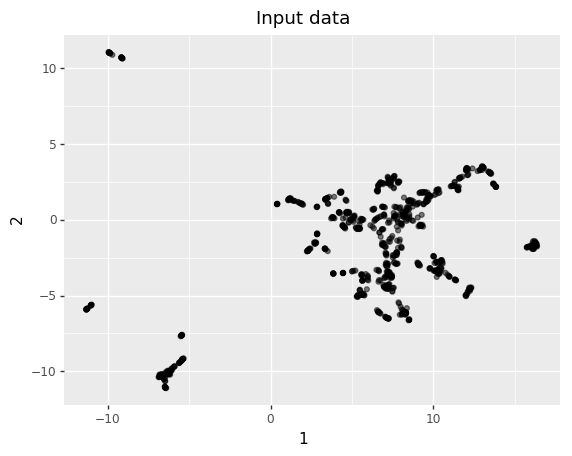

<ggplot: (-9223363309405669544)>

In [8]:
# UMAP embedding of original input data

# Get and save model
model = umap.UMAP(random_state=randomState).fit(normalized_data)

input_data_UMAPencoded = model.transform(normalized_data)
input_data_UMAPencoded_df = pd.DataFrame(data=input_data_UMAPencoded,
                                         index=normalized_data.index,
                                         columns=['1','2'])


ggplot(input_data_UMAPencoded_df, aes(x='1',y='2')) \
    + geom_point(alpha=0.5) \
    + ggtitle('Input data')

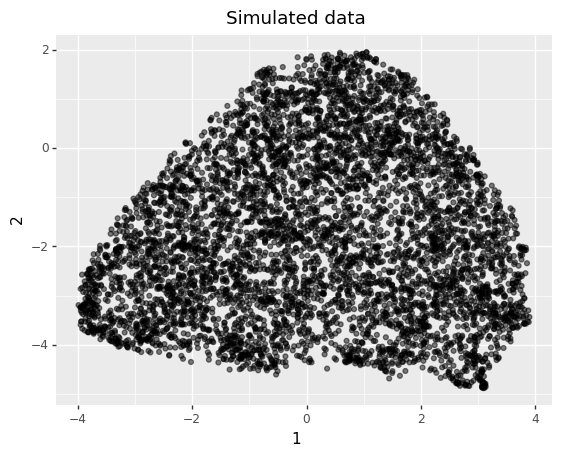

<ggplot: (8727449851901)>

In [9]:
# UMAP embedding of simulated data
## When dimensions are the same then can use the same UMAP projection, but for now it is different
simulated_data_UMAPencoded = umap.UMAP(random_state=randomState).fit_transform(simulated_data)
simulated_data_UMAPencoded_df = pd.DataFrame(data=simulated_data_UMAPencoded,
                                         index=simulated_data.index,
                                         columns=['1','2'])


ggplot(simulated_data_UMAPencoded_df, aes(x='1',y='2')) \
    + geom_point(alpha=0.5) \
    + ggtitle("Simulated data")

In [10]:
## Side by side original input vs simulated data

# Add label for input or simulated dataset
#input_data_UMAPencoded_df['dataset'] = 'original'
#simulated_data_UMAPencoded_df['dataset'] = 'simulated'

# Concatenate input and simulated dataframes together
#combined_data_df = pd.concat([input_data_UMAPencoded_df, simulated_data_UMAPencoded_df])

# Plot
#ggplot(combined_data_df, aes(x='1', y='2')) \
#+ geom_point(alpha=0.3) \
#+ facet_wrap('~dataset') \
#+ xlab('UMAP 1') \
#+ ylab('UMAP 2') \
#+ ggtitle('UMAP of original and simulated data')

## Visualize effects of multiple experiments in PCA space

Plotting PCA of 1 experiment vs 1 experiments...


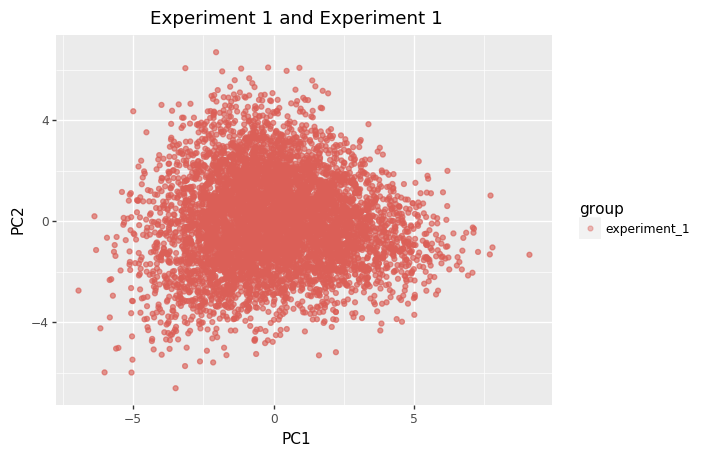

<ggplot: (8727534806939)>
Plotting PCA of 1 experiment vs 2 experiments...


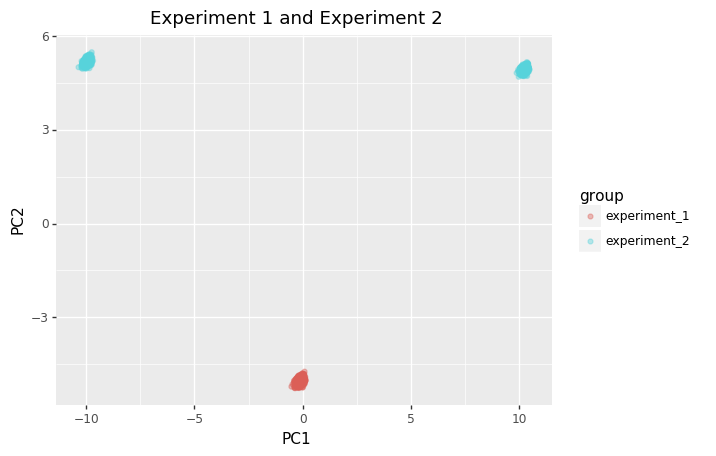

<ggplot: (-9223363309319894135)>
Plotting PCA of 1 experiment vs 5 experiments...


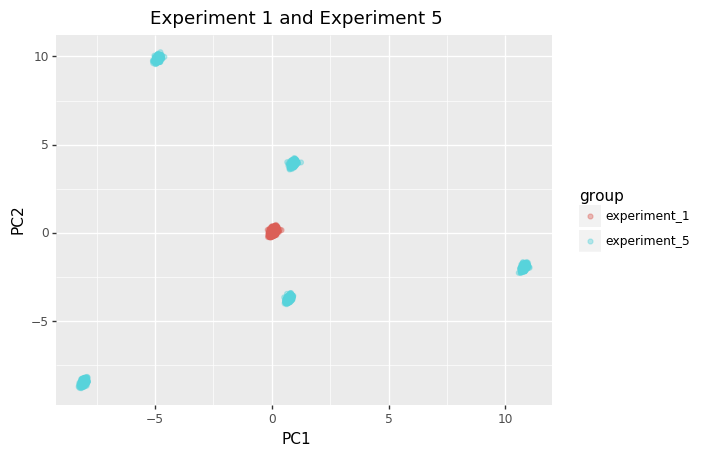

<ggplot: (-9223363309404688601)>
Plotting PCA of 1 experiment vs 10 experiments...


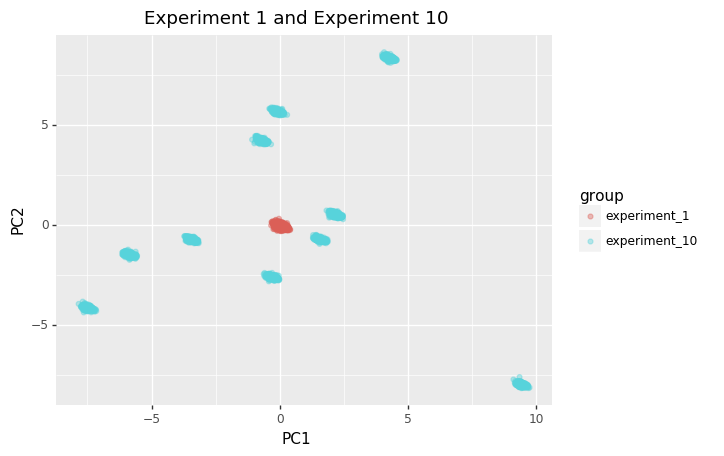

<ggplot: (8727450087407)>
Plotting PCA of 1 experiment vs 20 experiments...


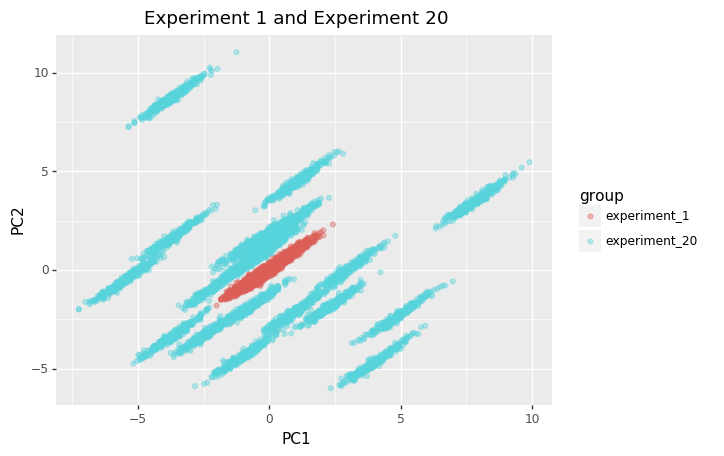

<ggplot: (-9223363309397260330)>
Plotting PCA of 1 experiment vs 50 experiments...


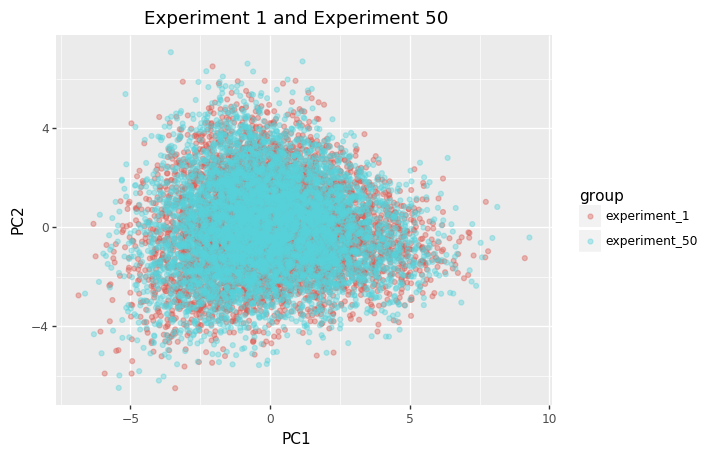

<ggplot: (-9223363309405717900)>
Plotting PCA of 1 experiment vs 100 experiments...


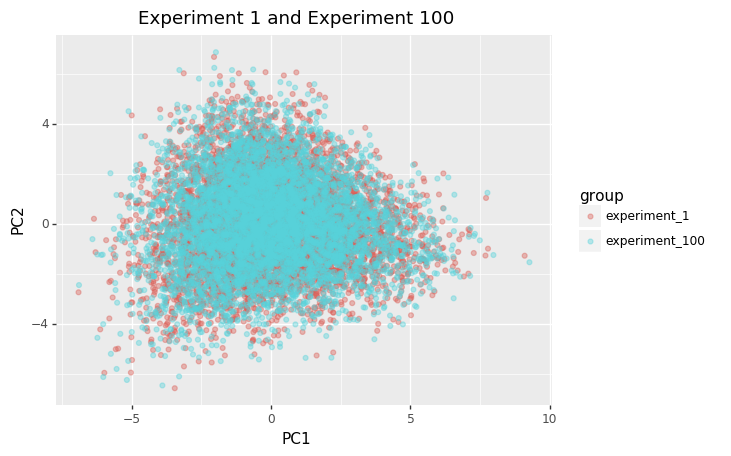

<ggplot: (-9223363309404846378)>
Plotting PCA of 1 experiment vs 500 experiments...


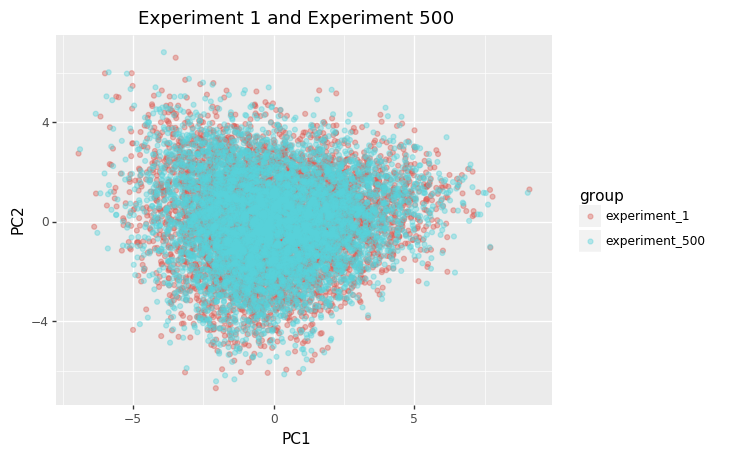

<ggplot: (8727449813838)>
Plotting PCA of 1 experiment vs 1000 experiments...


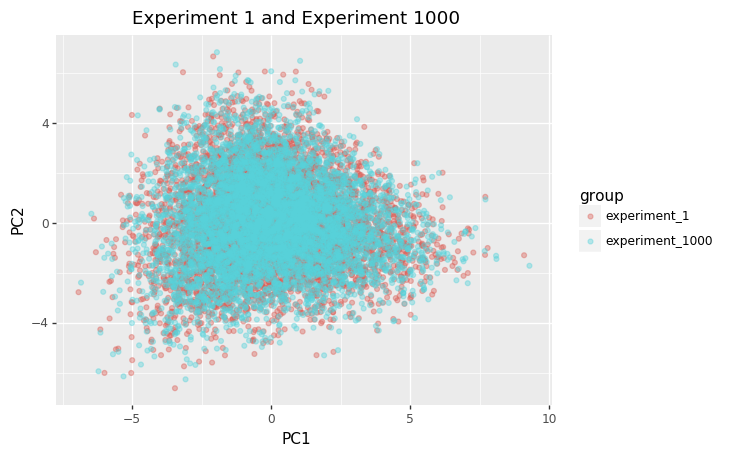

<ggplot: (8727535020997)>
Plotting PCA of 1 experiment vs 2000 experiments...


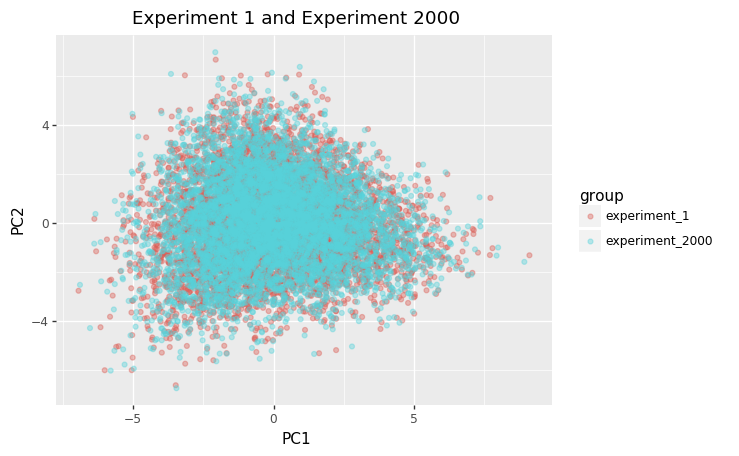

<ggplot: (-9223363309319982399)>
Plotting PCA of 1 experiment vs 3000 experiments...


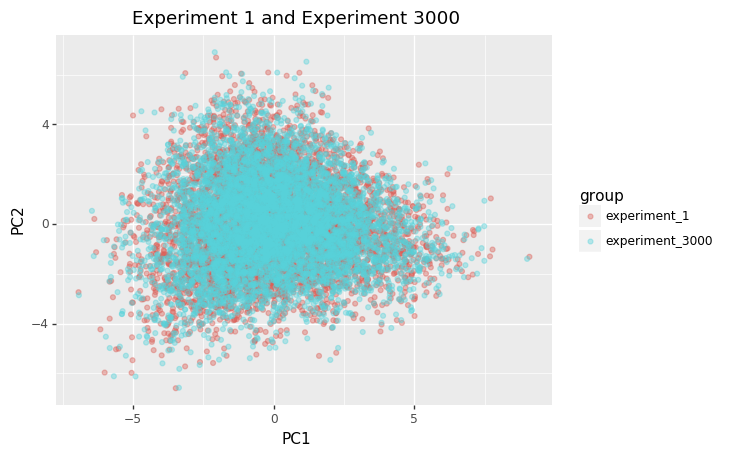

<ggplot: (-9223363309430811076)>
Plotting PCA of 1 experiment vs 6000 experiments...


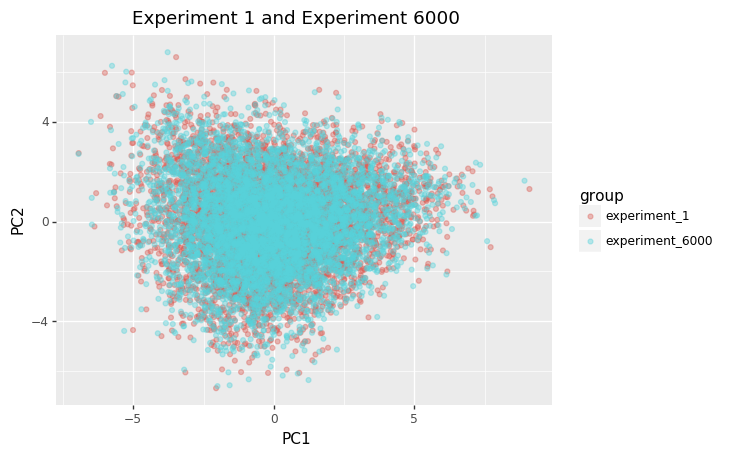

<ggplot: (8727534912825)>
CPU times: user 2min 55s, sys: 50.3 s, total: 3min 45s
Wall time: 2min 16s


In [11]:
%%time

all_data_df = pd.DataFrame()

# Get batch 1 data
experiment_1_file = os.path.join(
    experiment_dir,
    "Experiment_1.txt.xz")

experiment_1 = pd.read_table(
    experiment_1_file,
    header=0,
    index_col=0,
    sep='\t')


for i in lst_num_experiments:
    print('Plotting PCA of 1 experiment vs {} experiments...'.format(i))
    
    # Simulated data with all samples in a single batch
    original_data_df =  experiment_1.copy()
    
    # Add grouping column for plotting
    original_data_df['group'] = 'experiment_1'
    
    # Get data with additional batch effects added
    experiment_other_file = os.path.join(
        experiment_dir,
        "Experiment_"+str(i)+".txt.xz")

    experiment_other = pd.read_table(
        experiment_other_file,
        header=0,
        index_col=0,
        sep='\t')
    
    # Simulated data with i batch effects
    experiment_data_df =  experiment_other
    
    # Add grouping column for plotting
    experiment_data_df['group'] = "experiment_{}".format(i)
    
    # Concatenate datasets together
    combined_data_df = pd.concat([original_data_df, experiment_data_df])
    
    # PCA projection
    pca = PCA(n_components=2)

    # Encode expression data into 2D PCA space
    combined_data_numeric_df = combined_data_df.drop(['group'], axis=1)
    combined_data_PCAencoded = pca.fit_transform(combined_data_numeric_df)


    combined_data_PCAencoded_df = pd.DataFrame(combined_data_PCAencoded,
                                               index=combined_data_df.index,
                                               columns=['PC1', 'PC2']
                                              )
    
    # Add back in batch labels (i.e. labels = "batch_"<how many batch effects were added>)
    combined_data_PCAencoded_df['group'] = combined_data_df['group']
    
    # Add column that designates which batch effect comparision (i.e. comparison of 1 batch vs 5 batches
    # is represented by label = 5)
    combined_data_PCAencoded_df['num_experiments'] = str(i)
    
    # Concatenate ALL comparisons
    all_data_df = pd.concat([all_data_df, combined_data_PCAencoded_df])
    
    
    # Plot individual comparisons
    print(ggplot(combined_data_PCAencoded_df, aes(x='PC1', y='PC2')) \
          + geom_point(aes(color='group'), alpha=0.4) \
          + xlab('PC1') \
          + ylab('PC2') \
          + ggtitle('Experiment 1 and Experiment {}'.format(i))
         )

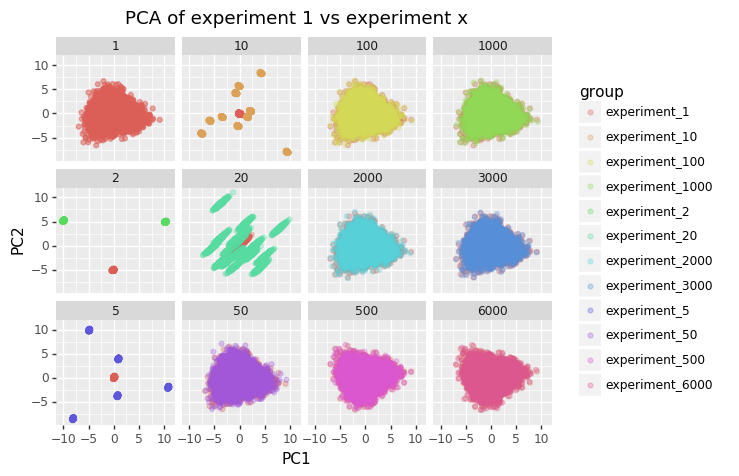

<ggplot: (8727534806897)>

In [12]:
# Plot all comparisons in one figure
ggplot(all_data_df, aes(x='PC1', y='PC2')) \
+ geom_point(aes(color='group'), alpha=0.3) \
+ facet_wrap('~num_experiments') \
+ xlab('PC1') \
+ ylab('PC2') \
+ ggtitle('PCA of experiment 1 vs experiment x')

## Permuted dataset (Negative control)

As a negative control we will permute the values within a sample, across genes in order to disrupt the gene expression structure.

In [13]:
# Read in permuated data
shuffled_simulated_data = pd.read_table(
    permuted_simulated_data_file,
    header=0,
    index_col=0,
    sep='\t')

In [14]:
# Label samples with label = perumuted
shuffled_simulated_data['group'] = "permuted"

# Concatenate original simulated data and shuffled simulated data
input_vs_permuted_df = pd.concat([original_data_df, shuffled_simulated_data])


input_vs_permuted = input_vs_permuted_df.drop(['group'], axis=1)
shuffled_data_PCAencoded = pca.fit_transform(input_vs_permuted)


shuffled_data_PCAencoded_df = pd.DataFrame(shuffled_data_PCAencoded,
                                           index=input_vs_permuted_df.index,
                                           columns=['PC1', 'PC2']
                                          )

# Add back in batch labels (i.e. labels = "batch_"<how many batch effects were added>)
shuffled_data_PCAencoded_df['group'] = input_vs_permuted_df['group']

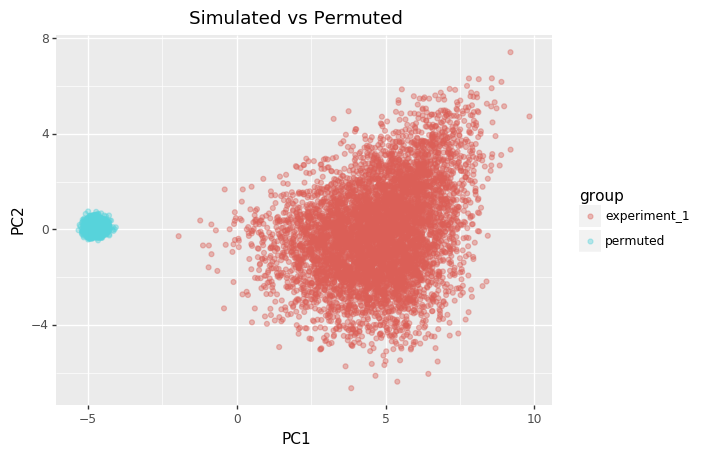

<ggplot: (8727449986596)>


In [15]:
# Plot permuted data
print(ggplot(shuffled_data_PCAencoded_df, aes(x='PC1', y='PC2')) \
      + geom_point(aes(color='group'), alpha=0.4) \
      + xlab('PC1') \
      + ylab('PC2') \
      + ggtitle('Simulated vs Permuted')
     )